# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dtreeviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Versões dos pacotes
%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.12.0

pandas    : 2.0.3
matplotlib: 3.7.1
numpy     : 1.25.0
seaborn   : 0.12.2
sklearn   : 1.3.0
dtreeviz  : 2.0.0



In [3]:
# Lendo CSV de BostonHousing.csv e Definindo as Variáveis X e y.
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
X = boston.drop(columns=['medv']).copy()
y = boston['medv']

In [4]:
# Amostra de Dados de 'boston'.
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Amostra de Dados de 'X'.
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
# Amostra de Dados de 'y'.
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
# Formato adequado para o sklearn.
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

#### Através da função Clustermap do Seaborn, podemos analisar com uma melhor visibilidade a matriz de correlação.

Encontra-se algumas variáveis com potencial preditivo interessante, que são elas:
| Nº |      Variáveis      |  Corr. |  Positiva / Negativa  |
| -- | ------------------- | ------ | --------------------- |
| 1  | **'rad' x 'tax'**   |   0.91 | (Correlação positiva) |
| 2  | **'indus' x 'nox'** |   0.76 | (Correlação positiva) |
| 3  | **'nox' x 'age'**   |   0.73 | (Correlação positiva) |
| 4  | **'indus' x 'tax'** |   0.72 | (Correlação positiva) |
<br>
| 1  | **'nox' x 'dis'**   | - 0.77 | (Correlação negativa) |
| 2  | **'age' x 'dis'**   | - 0.75 | (Correlação negativa) |
| 3  | **'lstat' x 'medv'**| - 0.74 | (Correlação negativa) |
| 4  | **'indus' x 'dis'** | - 0.71 | (Correlação negativa) |

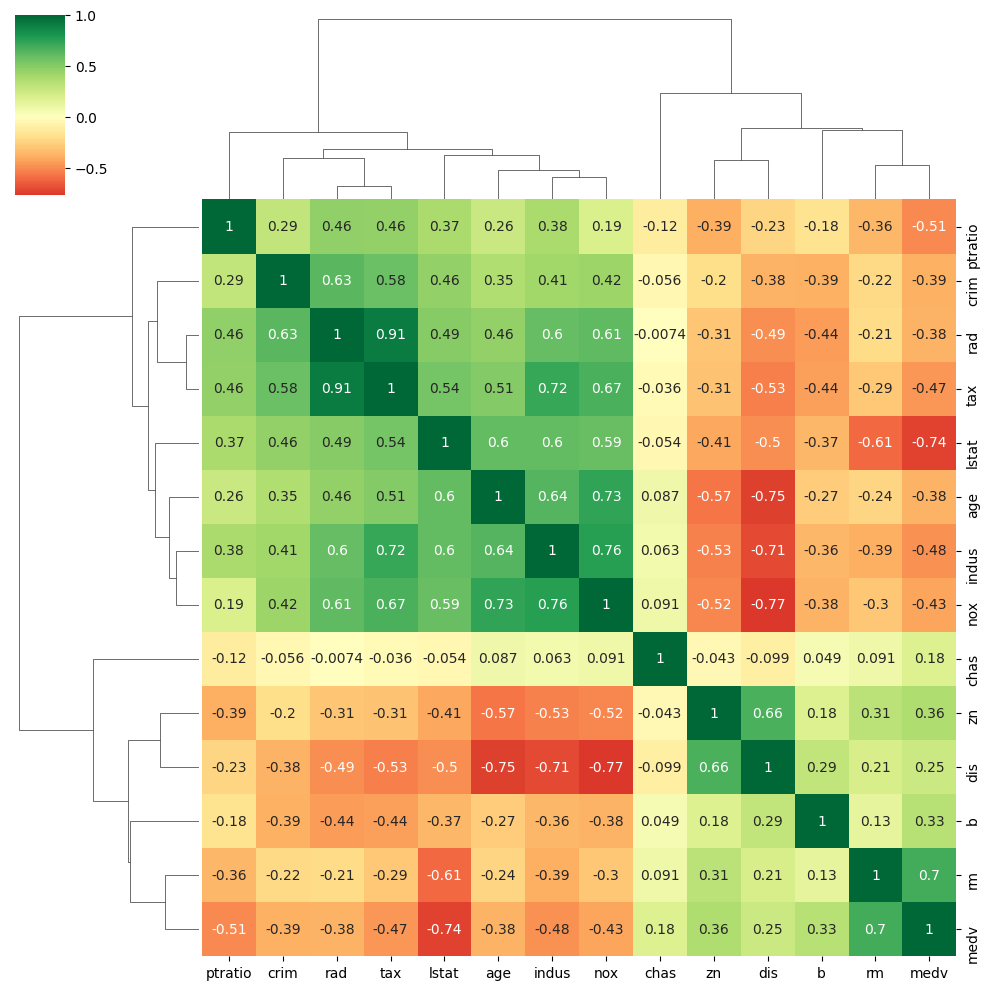

In [8]:
# Aplicação da Função clustermap().

sns.clustermap(data=boston.corr(), # Banco de dados com o método .corr() para analisar a correlação.
               center=0, # Centralizar os valores no 0.
               annot=True, # adicionar anotação (valores aparentes no método .corr()).
               cmap='RdYlGn', # Alteração das cores.
               figsize=(10,10)) # Tamanho da figura.

### 3. Separe os dados em validação e teste

In [9]:
# Executando a função .train_test_split() para definir o conjunto de dados para treino e para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [10]:
# Criando 2 DecisionTreeRegressor com profundidades 2 e 8.
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

# Treinando os modelos.
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [11]:
# Calculando R-quadrado.
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

# Definindo um template.
template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

# Imprimindo Resultado.
print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=2 é: 0,71
O R-quadrado da árvore com profundidade=8 é: 0,98


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A Árvore mais adequada seria a de **profundidade 2** por se tratar de uma visibilidade melhor. Porém deve-se fazer um estudo mais aprofundado para identificar outras profundidades que podem ser mais adequadas.

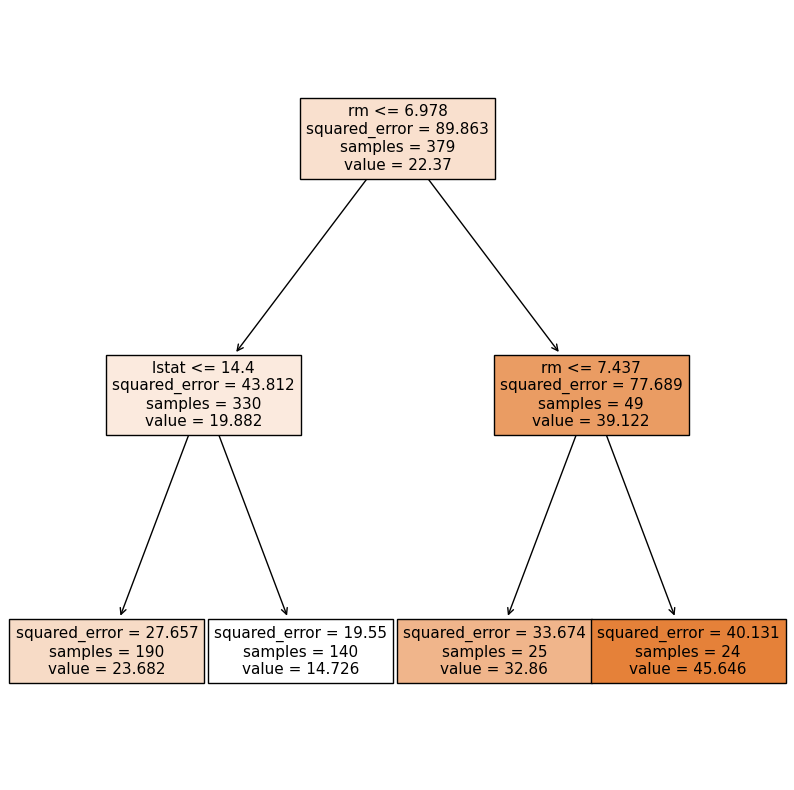

In [12]:
# Tamanho da Figura.
plt.rc('figure', figsize=(10, 10))

# Gerando Figura da árvore de decisão 'regr_1' usando tree.plot_tree().
tp = tree.plot_tree(regr_1, # Modelo da Árvore.
                    feature_names=list(X.columns), # Nome das colunas de 'X'.
                    filled=True) # Adicionando corees na Figura.

In [13]:
# Tamanho da Figura e Tamanho da Fonte.
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

# Gerando Figura da árvore de decisão 'regr_2' usando dtreeviz.model().
dtreeviz.model(regr_2, # Modelo da Árvore.
               X, # Variáveis de entrada.
               y, # Variável Resposta.
               target_name="medv", # O nome da Variável Resposta.
               feature_names=list(X.columns) # Nome das colunas de 'X'.
              ).view() # Visualização da Árvore.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

(process:1720): GLib-GIO-WARNING **: 11:02:35.969: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:1720): GLib-GIO-WARNING **: 11:02:35.985: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

Acredito que **'rm'** seria a variável mais importante por ter um MSE maior.

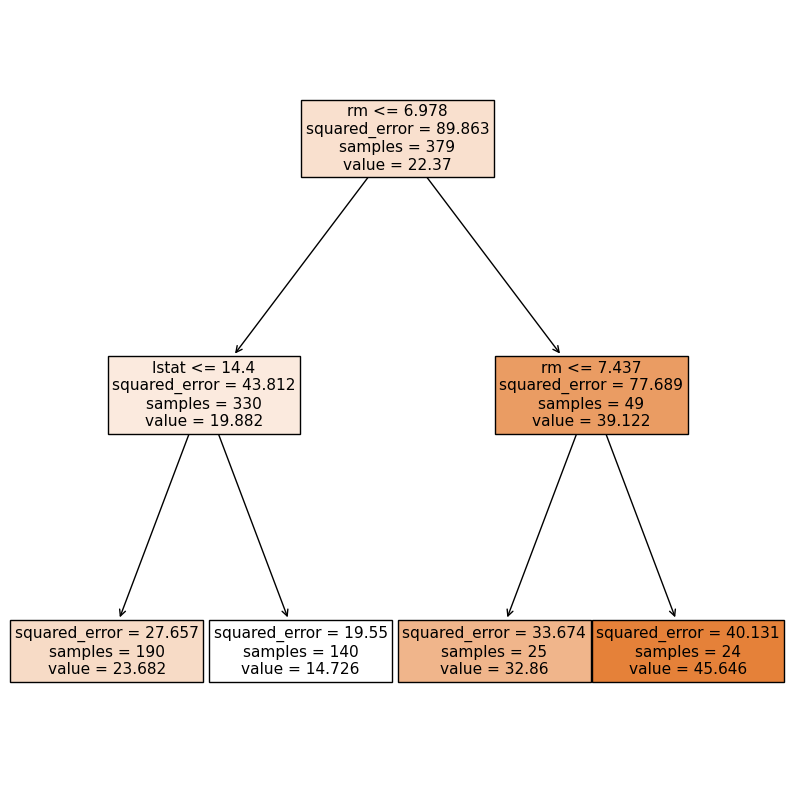

In [14]:
# Tamanho da Figura.
plt.rc('figure', figsize=(10, 10))

# Gerando Figura da árvore de decisão 'regr_1' usando tree.plot_tree().
tp = tree.plot_tree(regr_1, # Modelo da Árvore.
                    feature_names=list(X.columns), # Nome das colunas de 'X'.
                    filled=True) # Adicionando corees na Figura.